# DGS Mark 2

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [47]:
dgs = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_drishti.png')
dgs_rgb = cv2.cvtColor(dgs, cv2.COLOR_BGR2RGB)
dgs_res = cv2.resize(dgs_rgb, (int(dgs_rgb.shape[1]*50/100), int(dgs_rgb.shape[0]*50/100)), cv2.INTER_AREA)

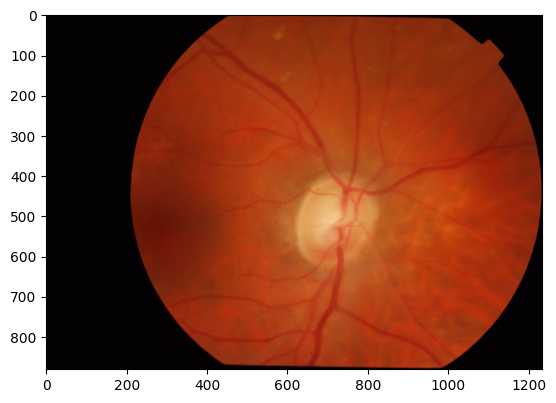

In [48]:
plt.imshow(dgs_res)

In [49]:
wlim = 135
dgs_gray = cv2.cvtColor(dgs_res.copy(), cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(dgs_gray)[3][0]
ymax = cv2.minMaxLoc(dgs_gray)[3][1]
roi = dgs_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

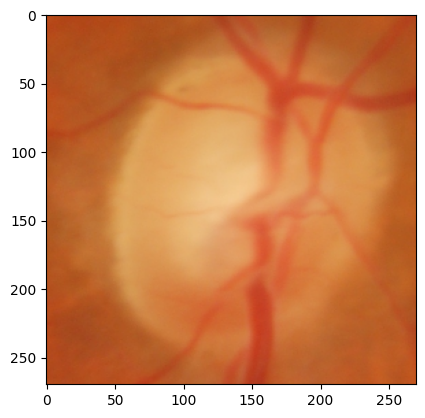

In [50]:
plt.imshow(roi)

In [51]:
green = roi[:,:,1]

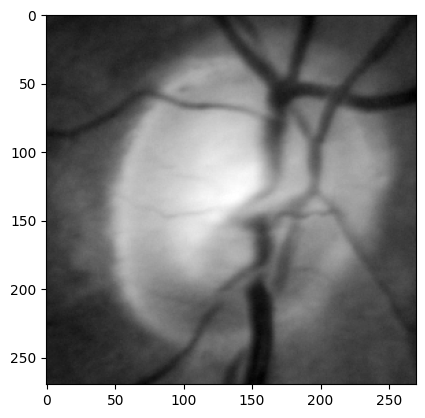

In [52]:
plt.imshow(green, 'gray')

In [53]:
greenbl = cv2.GaussianBlur(green.copy(), (19,19),0)

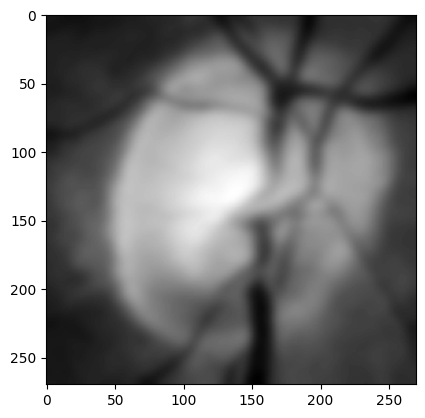

In [54]:
plt.imshow(greenbl, 'gray')

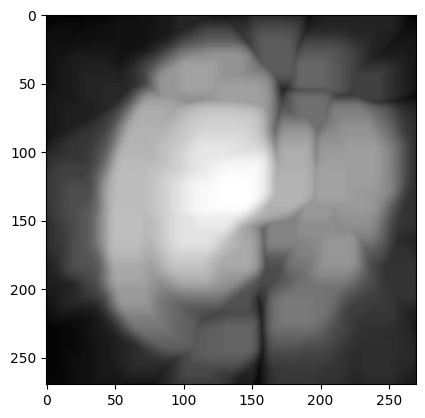

In [55]:
dilate = cv2.dilate(greenbl.copy(), kernel=np.ones((15,15), np.uint8)) # was 19,19
plt.imshow(dilate, 'gray')

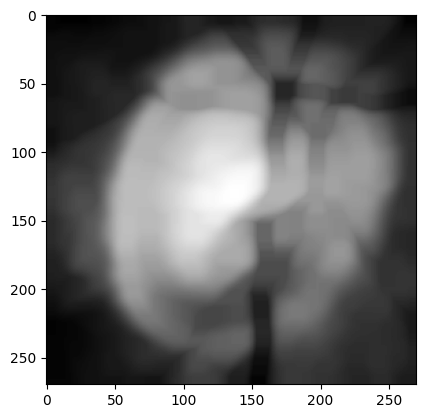

In [56]:
erosion = cv2.erode(dilate.copy(), kernel=np.ones((10,10), np.uint8))
plt.imshow(erosion, cmap='gray')

In [57]:
ret4,th4 = cv2.threshold(erosion.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

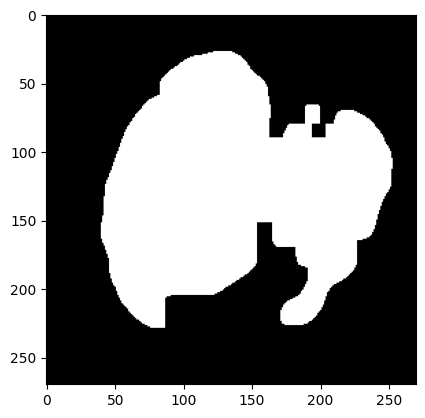

In [58]:
plt.imshow(th4, 'gray')

In [59]:
cont, hcy = cv2.findContours(th4.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

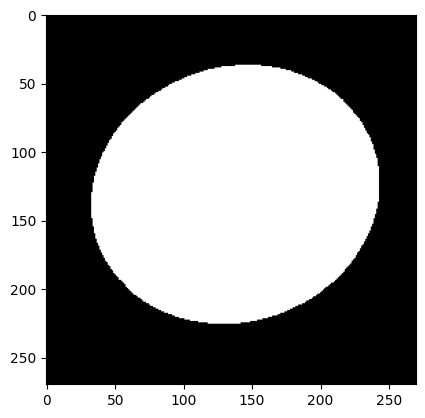

In [60]:
thhh = th4.copy()
roic = roi.copy()
for contour in cont:
    ellipse = cv2.fitEllipse(contour)
    od = np.zeros_like(thhh, dtype='uint8')
    cv2.ellipse(od, ellipse, (255, 255, 255), -1)
    cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(od, 'gray')

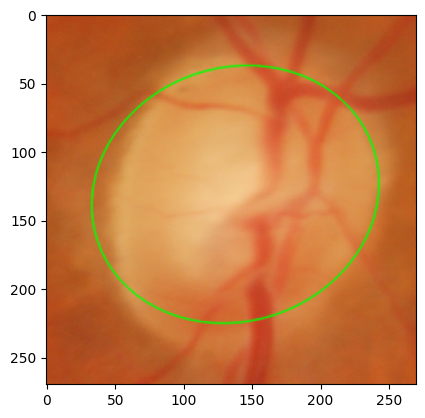

In [61]:
plt.imshow(roic)